# Lab 2 - Exploring and manipulating data. 
Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [2]:
import pandas as pd

howell_full = pd.read_csv("Howell.csv", sep = ";")
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


### Quick look at distributions:

In [6]:
print(howell_full.head(n = 10))
print(howell_full.describe())
howell_full.corr()

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


### Quick Visualization

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

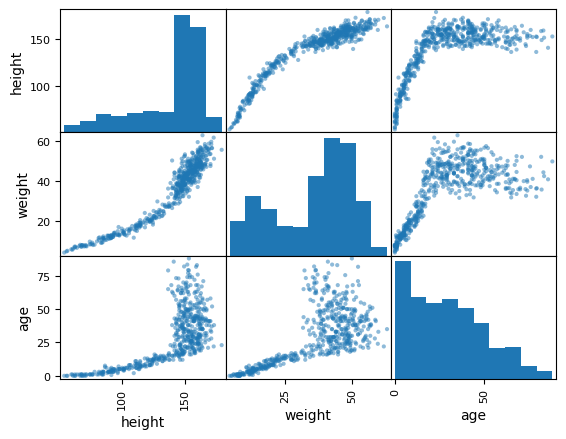

In [8]:
from pandas.plotting import scatter_matrix

atrributes = ['height', 'weight', 'age']
scatter_matrix(howell_full[atrributes])

### A Better Plot

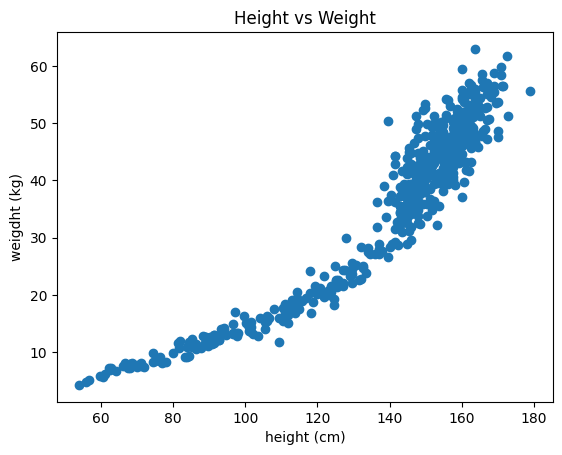

In [17]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

plt.scatter(height, weight)
plt.title('Height vs Weight')
plt.xlabel('height (cm)')
plt.ylabel('weigdht (kg)')
plt.show()

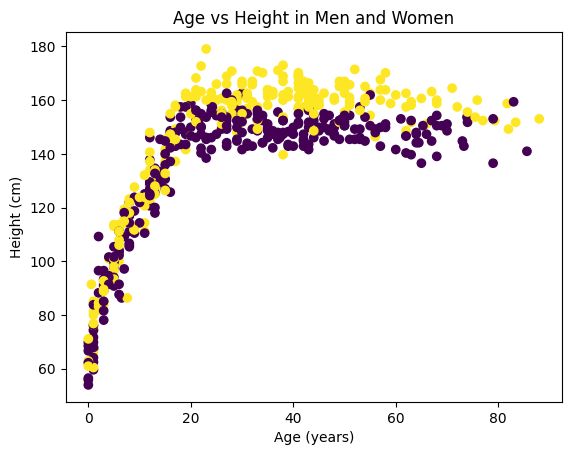

In [25]:
import matplotlib.pyplot as plt

height = howell_full['height']
age = howell_full['age']
gender = howell_full['male']

plt.scatter(age, height, c = gender)
plt.title('Age vs Height in Men and Women')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [26]:
# create a new feature with the name new
howell_full['new'] = howell_full['male'] + howell_full['age']
howell_full.info()

# get rid of the new feature
howell_full.drop(axis='columns', labels='new', inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis='index', how="any", inplace=True)

height_median = howell_full['height'].median()
weight_average = howell_full['weight'].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full['height'].fillna(height_median, inplace=True)
howell_full['weight'].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

### Adding a New Feature

In [27]:
def bmi (height, weight): 
    """"Compute BMI based on height and weight using metric units."""
    return 10000 * weight / (height **2)

print(bmi(150,40))
new_feature= bmi(howell_full['height'], howell_full['weight'])
print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n = 10)

17.77777777777778
0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

In [31]:
import numpy as np

def bmi_category(bmi):
    """Transform BMI into a single value."""
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
print(howell_full.head(n = 10))

howell_full['bmi class'].value_counts()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal


Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

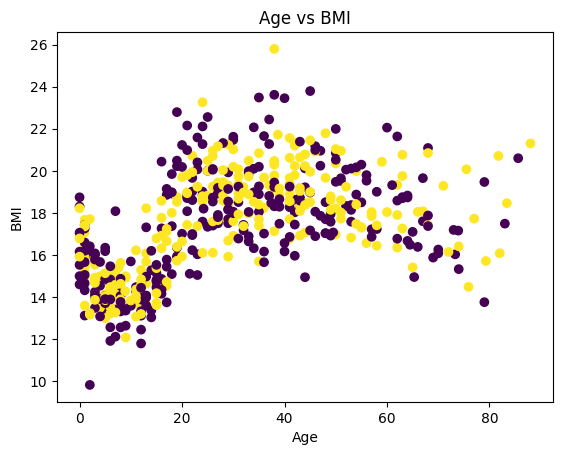

In [34]:
plt.scatter(howell_full['age'], howell_full['bmi'], c = howell_full['male'])
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

### Splitting the Data by Age

In [5]:
howell_full['height']

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

In [42]:
over18 = howell_full['age'] > 18
print(over18)

# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18]

print(f"There are {len(howell_adults)} adult instances.")
print(howell_adults.head(5))

print(f"\nThere are {len(howell_children)} child instances.")
print(howell_children.head(5))

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are 346 adult instances.
    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal

There are 198 child instances.
    height     weight   age  male        bmi    bmi class
18  121.92  19.617854  12.0     1  13.197801  Underweight
19  105.41  13.947954   8.0     0  12.552981  Underweight
20   86.36  10.489315   6.5     0  14.064421  Underweight
23  129.54  23.586784  13.0     1  14.055974  Underweight
24  109.22  15.989118   7.0     0  13.403560  Underweight


### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

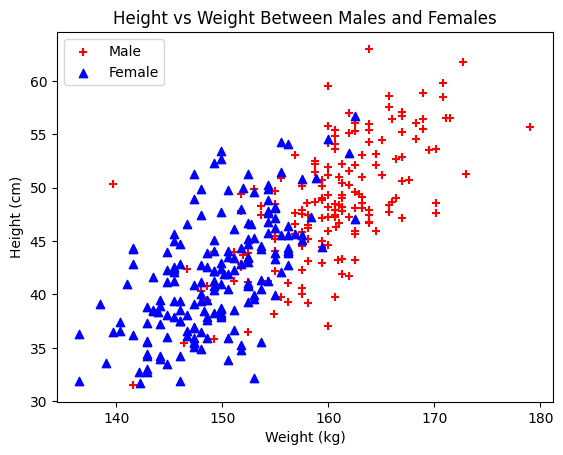

In [46]:
import matplotlib.pyplot as plt

male_height = np.ma.masked_where(howell_adults['male'] == 0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male'] == 1, howell_adults['height'])

weight = howell_adults['weight']

plt.scatter(male_height, weight, c = 'red', marker = '+')
plt.scatter(female_height, weight, c = 'blue', marker = '^')
plt.title('Height vs Weight Between Males and Females')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(['Male', 'Female'])
plt.show()

### Train/Test Data Split

In [77]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_adults, test_size = .2, random_state = 123)
print(f"Train size: {len(train_set)}. Test size: {len(test_set)}.")

print(f"\nAdult counts: \n{howell_adults['male'].value_counts()}.")
print(f"\nTrain counts: \n{train_set['male'].value_counts()}.")
print(f"\nTest counts: \n{test_set['male'].value_counts()}.")

Train size: 276. Test size: 70.

Adult counts: 
0    182
1    164
Name: male, dtype: int64.

Train counts: 
0    141
1    135
Name: male, dtype: int64.

Test counts: 
0    41
1    29
Name: male, dtype: int64.


### Stratified Test/Train Data Split

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 1, test_size  = 0.2, random_state = 123)

for train_indices, test_indices in splitter.split(howell_adults, howell_adults['male']):
    train_set = howell_adults.iloc[train_indices]
    test_set = howell_adults.iloc[test_indices]

print(f"Train size: {len(train_set)} \nTest size:   {len(test_set)}")

print(f"\nAdult counts: \n{howell_adults['male'].value_counts()}")
print(f"\nTrain counts: \n{train_set['male'].value_counts()}")
print(f"\nTest counts: \n{test_set['male'].value_counts()}")

Train size: 276 
Test size:   70

Adult counts: 
0    182
1    164
Name: male, dtype: int64

Train counts: 
0    145
1    131
Name: male, dtype: int64

Test counts: 
0    37
1    33
Name: male, dtype: int64
